In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

In [2]:
df = pd.read_csv("Used Car Dataset.csv")
df.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [3]:
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [4]:
# extracting year from the registration year
def process_date_column(date):
    if len(date) == 6:
        return '20' + date[-2:]
    elif len(date) == 4:
        return date
    else:
        return None
df['registration_year'] = df['registration_year'].apply(process_date_column)

# converting manufacturing year to numeric
def is_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False
df = df[df['manufacturing_year'].apply(is_numeric)]

In [5]:
# Converting registration year to numeric and filling the null values.
df['registration_year'] = pd.to_numeric(df['registration_year'], errors='coerce')
df['registration_year'] = df['registration_year'].fillna(-1).astype(int)

# Converting the manufacturing year to numeric and filling the null values.
df['manufacturing_year'] = pd.to_numeric(df['manufacturing_year'], errors='coerce')
df['manufacturing_year'] = df['manufacturing_year'].fillna(-1).astype(int)

# extracting only the year from the manufacturing year
def process_manufacturing_year(year):
    try:
        return int(year)
    except ValueError:
        return None
df['manufacturing_year'] = df['manufacturing_year'].apply(process_manufacturing_year)

# Drop rows with NaN values in 'manufacturing_year'
df = df.dropna(subset=['manufacturing_year'])

In [6]:
# drop the columns which are not needed.
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['max_power(bhp)'])
# drop the nan values from the dataset.
df = df.dropna()

In [7]:
# extracting the year from the car name column
def extract_year(car_name):
    words = car_name.split()
    for word in words:
        if word.isdigit() and len(word) == 4:
            return word
    return None

df['Year'] = df['car_name'].apply(extract_year)

# Drop the 'Year' from 'CarName'
df['car_name'] = df['car_name'].str.replace('\d{4}', '').str.strip()
df = df.drop(columns=['Year'])

C:\Users\Richa\AppData\Local\Temp\ipykernel_27020\368853218.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['car_name'] = df['car_name'].str.replace('\d{4}', '').str.strip()


In [8]:
# extracting the company name from the car name and inserting it into the original dataset.
companies = df['car_name'].str.split().str.get(0)
df.insert(0,"Company",companies,True)

In [9]:
# viewing the dataset after doing some preprocessing.
df

,Company,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),torque(Nm),price(in lakhs)
0,Mercedes-Benz,Mercedes-Benz S-Class S400,2017,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,333.0,63.75
1,Nissan,Nissan Magnite Turbo CVT XV Premium Opt BSVI,2021,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,9863.0,8.99
2,BMW,BMW X1 sDrive 20d xLine,2018,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,188.0,23.75
3,Kia,Kia Seltos GTX Plus,2019,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,13808.0,13.56
4,Skoda,Skoda Superb LK 1.8 TSI AT,2019,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,Maruti,Maruti Ertiga VXI CNG,2022,Third Party insurance,CNG,7,26500,First Owner,Manual,2022,26.11,1462.0,8663.0,11.50
1548,Hyundai,Hyundai Creta SX Opt Diesel AT BSVI,2020,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,250.0,17.41
1550,Honda,Honda WR-V i-VTEC S,2017,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,887.0,5.85
1551,Volkswagen,Volkswagen Polo 1.0 MPI Comfortline,2018,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,75.0,4.75


In [10]:
# Correlated features
price_corr = df.corr()['price(in lakhs)'].sort_values(ascending=False)
print(price_corr)

price(in lakhs)       1.000000
mileage(kmpl)         0.045866
kms_driven            0.003620
engine(cc)           -0.003297
torque(Nm)           -0.006805
seats                -0.013591
manufacturing_year   -0.104492
registration_year    -0.104708
Name: price(in lakhs), dtype: float64


C:\Users\Richa\AppData\Local\Temp\ipykernel_27020\2343535375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_corr = df.corr()['price(in lakhs)'].sort_values(ascending=False)


In [11]:
# drop the duplicates from the dataset.
df.drop_duplicates(inplace=True)
# drop the unwanted columns.
df = df.drop(columns=['manufacturing_year'])
df = df.drop(columns=['Company','car_name','insurance_validity','fuel_type','ownsership','transmission'])

In [12]:
# feature selection from the given attribute.
df.registration_year = 2024-df['registration_year']
# renaming the column to age
df=df.rename(columns={'registration_year':'Age'})
df

,Age,seats,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price(in lakhs)
0,7,5,56000,7.81,2996.0,333.0,63.75
1,3,5,30615,17.40,999.0,9863.0,8.99
2,6,5,24000,20.68,1995.0,188.0,23.75
3,5,5,18378,16.50,1353.0,13808.0,13.56
4,5,5,44900,14.67,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...
1547,2,7,26500,26.11,1462.0,8663.0,11.50
1548,4,5,35000,1493.00,11345.0,250.0,17.41
1550,7,5,49000,17.50,1199.0,887.0,5.85
1551,6,5,40000,18.78,999.0,75.0,4.75


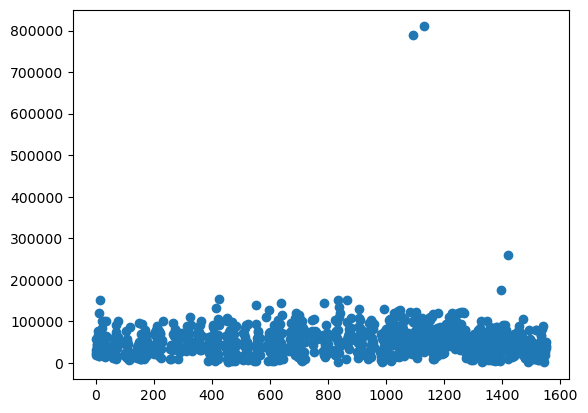

In [13]:
# need to find outlier in the selected features using scatterplot.
import matplotlib.pyplot as plt
plt.scatter(df.index,df["kms_driven"])

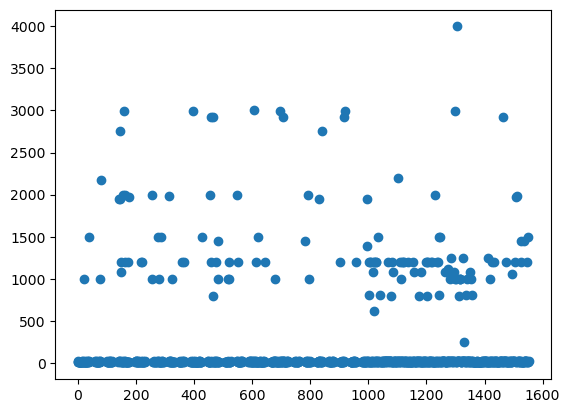

In [14]:
plt.scatter(df.index,df["mileage(kmpl)"])

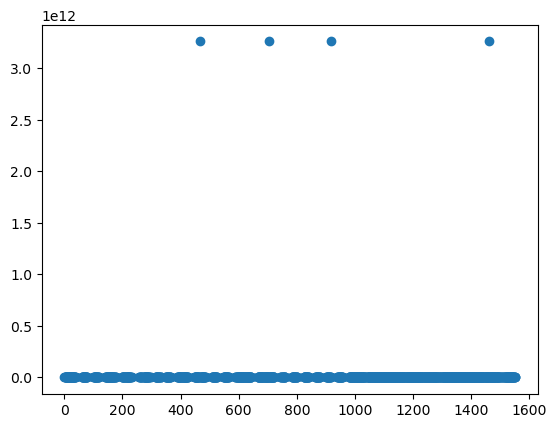

In [15]:
plt.scatter(df.index,df["engine(cc)"])

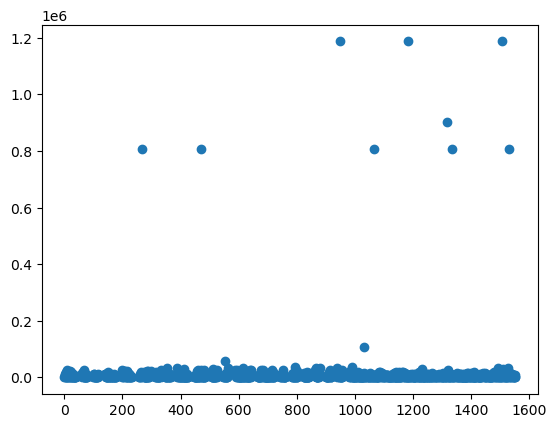

In [16]:
plt.scatter(df.index,df["torque(Nm)"])

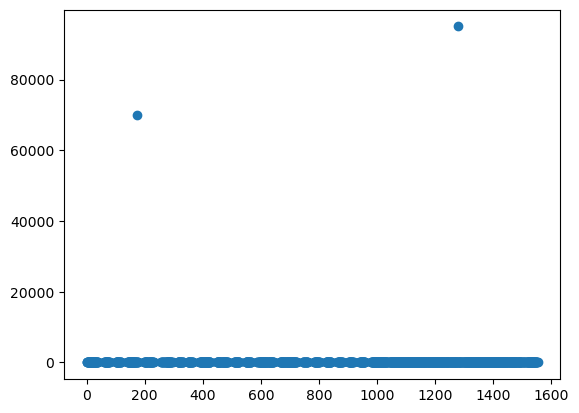

In [17]:
plt.scatter(df.index,df["price(in lakhs)"])

In [18]:
# removing outliers.
df = df[df["mileage(kmpl)"] <= 245]
df = df[df["torque(Nm)"] <= 100000]

import pandas as pd
from scipy.stats import zscore

columns_to_process = ["engine(cc)", "price(in lakhs)", "kms_driven","torque(Nm)","mileage(kmpl)"]

# Loop 
for column in columns_to_process:
    z_scores = zscore(df[column])
    threshold = 3
    outliers = (abs(z_scores) > threshold)
    df = df[~outliers]

In [19]:
# Split the data into features and target
X = df.drop(columns=['price(in lakhs)'])
y = df['price(in lakhs)']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Shape of X_train: (744, 6)
Shape of X_test: (187, 6)
Shape of y_train: (744,)
Shape of y_test: (187,)


In [21]:
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau


# Build the Neural Network Model 
model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))


model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
callbacks = [reduce_lr]

model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks= callbacks, verbose=1)


Epoch 1/200

19/19 [==============================] - 3s 27ms/step - loss: 437.4732 - val_loss: 447.3922 - lr: 1.0000e-04
Epoch 2/200
19/19 [==============================] - 0s 10ms/step - loss: 431.6527 - val_loss: 441.0696 - lr: 1.0000e-04
Epoch 3/200
19/19 [==============================] - 0s 9ms/step - loss: 424.9047 - val_loss: 432.3270 - lr: 1.0000e-04
Epoch 4/200
19/19 [==============================] - 0s 9ms/step - loss: 415.9090 - val_loss: 420.7267 - lr: 1.0000e-04
Epoch 5/200
19/19 [==============================] - 0s 9ms/step - loss: 401.0866 - val_loss: 405.2717 - lr: 1.0000e-04
Epoch 6/200
19/19 [==============================] - 0s 9ms/step - loss: 386.1648 - val_loss: 385.0921 - lr: 1.0000e-04
Epoch 7/200
19/19 [==============================] - 0s 9ms/step - loss: 364.5956 - val_loss: 358.7148 - lr: 1.0000e-04
Epoch 8/200
19/19 [==============================] - 0s 9ms/step - loss: 335.6057 - val_loss: 325.6193 - lr: 1.0000e-04
Epoch 9/200
19/19 [=================

19/19 [==============================] - 0s 9ms/step - loss: 106.4471 - val_loss: 81.9102 - lr: 1.0000e-04
Epoch 134/200
19/19 [==============================] - 0s 9ms/step - loss: 110.3915 - val_loss: 83.3085 - lr: 1.0000e-04
Epoch 135/200
19/19 [==============================] - 0s 8ms/step - loss: 107.3260 - val_loss: 82.2294 - lr: 1.0000e-04
Epoch 136/200
19/19 [==============================] - 0s 9ms/step - loss: 78.5265 - val_loss: 79.4966 - lr: 1.0000e-04
Epoch 137/200
19/19 [==============================] - 0s 9ms/step - loss: 94.6352 - val_loss: 78.7523 - lr: 1.0000e-04
Epoch 138/200
19/19 [==============================] - 0s 10ms/step - loss: 92.8799 - val_loss: 78.4017 - lr: 1.0000e-04
Epoch 139/200
19/19 [==============================] - 0s 9ms/step - loss: 108.1784 - val_loss: 81.0378 - lr: 1.0000e-04
Epoch 140/200
19/19 [==============================] - 0s 10ms/step - loss: 88.1637 - val_loss: 82.0322 - lr: 1.0000e-04
Epoch 141/200
19/19 [===========================

In [22]:
# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)  
y_pred = model.predict(X_test_scaled)

# Calculate metrics on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
import math
print(f'Mean Squared Error on Test Set: {mse:.2f}')
print(f'Root Mean Squared Error on Test Set: {math.sqrt(mse):.2f}')
print(f'Mean Absolute Error on Test Set: {mae:.2f}')
print(f'R-squared on Test Set: {r2:.2f}')

# Display some actual vs predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(result_df.head())


6/6 [==============================] - 0s 3ms/step
Mean Squared Error on Test Set: 25.84
Root Mean Squared Error on Test Set: 5.08
Mean Absolute Error on Test Set: 3.01
R-squared on Test Set: 0.80
      Actual  Predicted
1421    3.38   3.359960
114     9.69   9.032134
1172    2.50   2.848729
1022    9.75   6.754199
1437    4.42   4.658501
